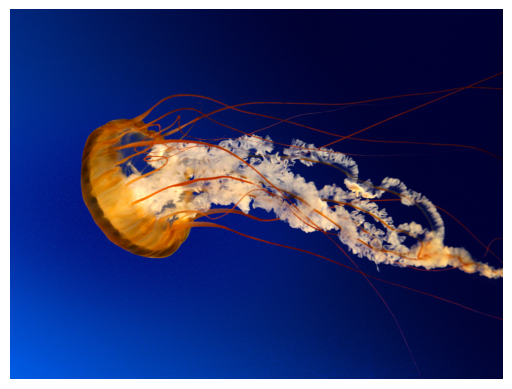

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("Task1/Image for task 1.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()



In [2]:
red , green , blue  = cv2.split(image_rgb)

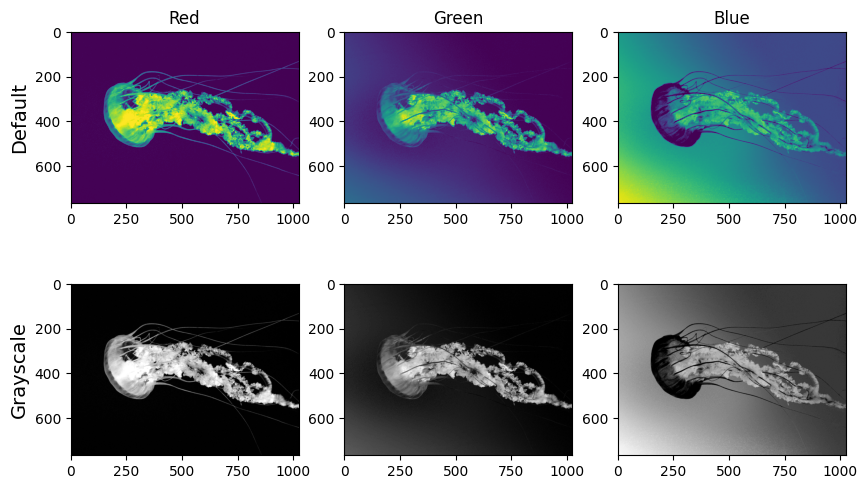

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

channels = {'Red': red, 'Green': green, 'Blue': blue}
row_labels = ['Default', 'Grayscale']

for row in range(2):
    for col, (color_name, channel) in enumerate(channels.items()):
        ax = axes[row, col]
        
        if row == 0:
            temp_img = channel
            ax.imshow(temp_img)
        else:
            ax.imshow(channel, cmap='gray')

        if row == 0:
            ax.set_title(color_name, fontsize=12)
        if col == 0:
            ax.set_ylabel(row_labels[row], fontsize=14)

        
        



plt.show()


In [4]:
def plot_histogram(channel, title, color):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.bar(range(256), hist.flatten(), color=color, width=0.8)
    plt.title(title)
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")


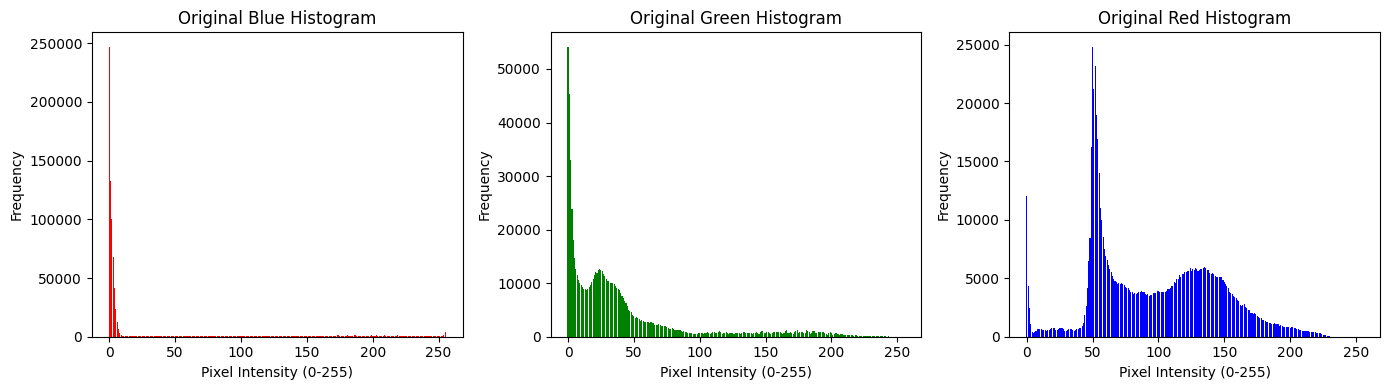

In [5]:
plt.figure(figsize=(14, 4))  

plt.subplot(1, 3 , 1)
plot_histogram(red, "Original Blue Histogram", "red")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")

plt.subplot(1, 3 , 2)
plot_histogram(green, "Original Green Histogram", "green")
plt.xlabel("Pixel Intensity (0-255)")

plt.subplot(1, 3 , 3)
plot_histogram(blue, "Original Red Histogram", "blue")
plt.xlabel("Pixel Intensity (0-255)")

plt.tight_layout()
plt.show()


In [6]:
blue_eq = cv2.equalizeHist(blue)
green_eq = cv2.equalizeHist(green)
red_eq = cv2.equalizeHist(red)

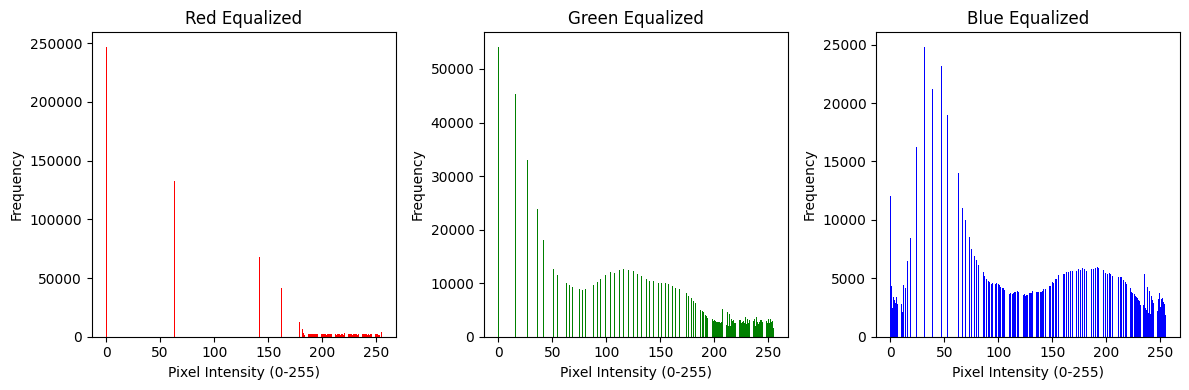

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plot_histogram(red_eq, "Red Equalized", "red")

plt.subplot(1,3,2)
plot_histogram(green_eq, "Green Equalized", "green")

plt.subplot(1,3,3)
plot_histogram(blue_eq, "Blue Equalized", "blue")

plt.tight_layout()
plt.show()


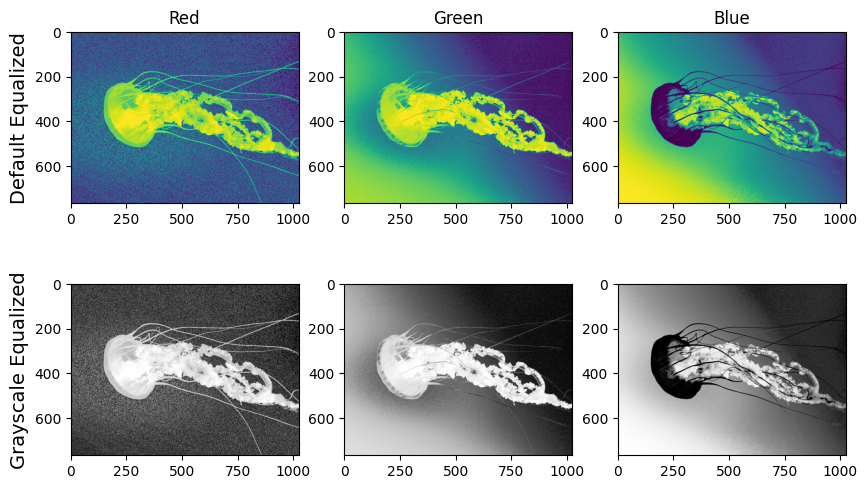

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

channels = {'Red': red_eq, 'Green': green_eq, 'Blue': blue_eq}
row_labels = ['Default Equalized', 'Grayscale Equalized']

for row in range(2):
    for col, (color_name, channel) in enumerate(channels.items()):
        ax = axes[row, col]
        
        if row == 0:
            temp_img = channel
            ax.imshow(temp_img)
        else:
            ax.imshow(channel, cmap='gray')

        if row == 0:
            ax.set_title(color_name, fontsize=12)
        if col == 0:
            ax.set_ylabel(row_labels[row], fontsize=14)


plt.show()


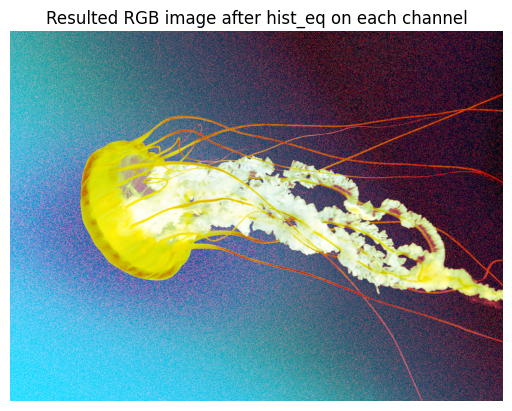

In [9]:
image_eq = cv2.merge([red_eq, green_eq, blue_eq])
plt.title("Resulted RGB image after hist_eq on each channel")
plt.imshow(image_eq)
plt.axis("off")
plt.show()
